# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [3]:
import nltk

# Uncomment if not already installed
#nltk.download('book')

## 2.2 Introduction to NLTK

1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

In [30]:
from nltk.book import *

text2.common_contexts("monstrous","very")

len(text2)


('The following word(s) were not found:', 'm o n s t r o u s')


141576

2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again.
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!



In [102]:
import pandas as pd
import requests
import os
import json

# Read the CSV file into a DataFrame
df_rappers = pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/Rappers.csv')

# Define the API parameters
api_params = {
    "action": "query",
    "prop": "extracts",
    "exlimit": "1",
    "explaintext": "1",
    "format": "json",
    "titles": None  # This will be filled in from the DataFrame
}

# Create a directory to store the text files
if not os.path.exists('RapperTexts'):
    os.makedirs('RapperTexts')

# Loop through the DataFrame
for index, row in df_rappers.iterrows():
    rapper_name = row['WikipediaPageName']
    coast = row['Coast']
    api_params["titles"] = rapper_name

    # Make the API request
    response = requests.get('https://en.wikipedia.org/w/api.php', params=api_params)
    response_json = response.json()
    
    # Navigate through JSON to find the 'extract' key
    page = next(iter(response_json['query']['pages'].values()))
    
    # Check if 'extract' exists in the JSON
    if 'extract' in page:
        text = page['extract']
        
        # Save the text and coast to a .txt file
        with open(f'RapperTexts/{rapper_name}.txt', 'w', encoding='utf-8') as f:
            f.write(f"Coast: {coast}\n\n")
            f.write(text)


> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!*

In [103]:
from nltk.corpus import PlaintextCorpusReader
import nltk

# Create and order them with same order in df_rappers
file_list = [f"{rapper_name}.txt" for rapper_name in df_rappers['WikipediaPageName']]

# Create rapper corpus
corpus_root = './RapperTexts' # Directory of corpus
rapper_corpus = PlaintextCorpusReader(corpus_root, file_list)

# Create NLTK Text object
rapper_text = nltk.Text(rapper_corpus.words())





In [49]:
# Test
#rapper_text.concordance('rap')


Displaying 25 of 1694 matches:
career === Hernandez first decided to rap in 2012 after meeting Peter " Righteo
age of a rapper and suggested that he rap because of this , along with Hernande
' cadence . Hernandez began releasing rap songs in 2014 , starting with " 69 " 
 was an outgrowth of the " SoundCloud rap explosion " and was notable for its w
p hop , or more specifically , scream rap , hardcore hip hop , SoundCloud rap ,
m rap , hardcore hip hop , SoundCloud rap , and punk rap , often incorporating 
e hip hop , SoundCloud rap , and punk rap , often incorporating elements of dri
er and one of the founding members of rap group Killarmy . He was initially res
 the Godson , AZ , Noreaga and Kool G Rap . He has worked with several high - p
ust ( with Joe Blow ) 2018 : Son of G Rap ( with Kool G Rap ) 2019 : Loyalty an
w ) 2018 : Son of G Rap ( with Kool G Rap ) 2019 : Loyalty and Trust ( with Fle
os ., 1990 Markey Fresh – The Mack of Rap – Jive / RCA , 1989 X - Clan – Heed T
ia ). He 

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any words you like.
> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).


"_is t_you i_college "_me of_, "_" "_u &_. experienced_. "_it -_and
the_was


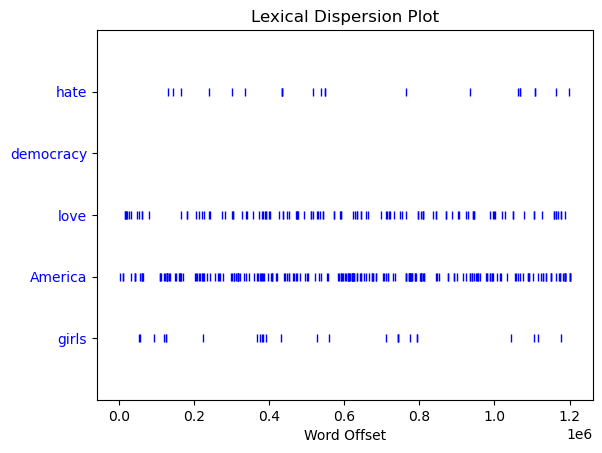

In [104]:
#rapper_text.concordance('love')
#rapper_text.similar('love')
rapper_text.common_contexts(['love','hate'])


# dispersion plot
rapper_text.dispersion_plot(["hate","democracy","love","America","girls"])


Answer
    
    'America' and to a certain degree 'love' is frequently seen regurlarly throughout the raps where as 'girls' and 'hate' is sparsely seen. Democracy is not mentioned at all.


> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.


Answer
    
    A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A collocations on the other hand is a set of words that appear unusually often and often immutable in the sense it will lose its meaning if you substitute oe of the words eg. 'red' 'wine'.



In [105]:
rapper_text.collocations()

New York; hip hop; External links; Los Angeles; studio album; stage
name; Billboard 200; Hot 100; American rapper; music video; Hip Hop;
Early life; Snoop Dogg; United States; York City; better known; debut
album; Billboard Hot; High School; Def Jam


> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?


In [106]:
starts_w_h= [w for w in rapper_text if w.startswith('h')]

s_starts_w_h=sorted(starts_w_h[:5]) # Sort the list alphabetically

s_starts_w_h

['hair', 'has', 'his', 'his', 'his']

> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.


In [107]:
Snoop=rapper_text.index("Snoop")
start_index=Snoop
end_index=Snoop

# find the sentence that cointains the word "Snoop"

# Find the start index of the sentence
while start_index > 0 and not rapper_text[start_index - 1].endswith('.'):
    start_index -= 1

# Find the end index of the sentence
while end_index < len(rapper_text) - 1 and not rapper_text[end_index].endswith('.'):
    end_index += 1

# Extract the complete sentence
complete_sentence = " ".join(rapper_text[start_index:end_index + 1])

Snoop, complete_sentence


(43966,
 'As a Songwriter , Asante wrote the lyrics for the 2023 - 2024 official Monday Night Football anthem , " In the Air Tonight ", performed by Snoop Dogg , Chris Stapleton , and Cindy Blackman Santana .')

> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [108]:
#  Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.
rapper_text = [w for w in rapper_text if w.isupper()]
rapper_text = sorted(rapper_text, key=len, reverse=True)
rapper_text[:5]


['CHRISTMAKWHANNUVUSWALIYEARS',
 'SHINIGAMISTARSHIP',
 'AREYOUREADYKIDS',
 'MERRYPOCALYPSE',
 'CHAMILLIONAIRE']

> *Exercise 2*: Basic stats
>
> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?


In [109]:
# Token is a sequence of characters that we want to treat as a group. Words and punctuation symbols are examples of tokens.
len(rapper_text)

31457

> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;


Answer

    Lexical Diversity tells us something about the richness of the text. Ratio or % of words that are distinct. A higher lexical diversity score usually indicates a wider range of vocabulary and potentially a richer, more complex text.

In [110]:
def lexical_diversity(rapper_text):
    return len(set(rapper_text)) / len(rapper_text)


def percentage(count, total):
    return 100*count/total

# Lexical diversity

lexical_diversity(rapper_text)



0.06119464666052071

Answer

    We can see the number of distinct words is just 6% or equivalent to each word being used 16 times on average. Meaning 6% of the words are unique


>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.


In [118]:

# Initialize lists to hold all words from each coast
all_words_east_coast = []
all_words_west_coast = []

# Loop through the DataFrame
for index, row in df_rappers.iterrows():
    rapper_name = row['WikipediaPageName']
    coast = row['Coast']
    
    try:
        with open(f'RapperTexts/{rapper_name}.txt', 'r', encoding='utf-8') as f:
            text = f.read()
        
        words = text.split()
        
        if coast == 'East':
            all_words_east_coast.extend(words)
        elif coast == 'West':
            all_words_west_coast.extend(words)
    except FileNotFoundError:
        print(f"File for {rapper_name} not found.")

# Calculate the total lexical diversity for each coast
total_lexical_diversity_east = lexical_diversity(all_words_east_coast)
total_lexical_diversity_east_percentage = percentage(total_lexical_diversity_east, 1)

total_lexical_diversity_west = lexical_diversity(all_words_west_coast)
total_lexical_diversity_west_percentage = percentage(total_lexical_diversity_west, 1)

print(f"Total Lexical Diversity for East Coast Rappers: {round(total_lexical_diversity_east_percentage)}%")
print(f"Total Lexical Diversity for West Coast Rappers: {round(total_lexical_diversity_west_percentage)}%")

Total Lexical Diversity for East Coast Rappers: 11%
Total Lexical Diversity for West Coast Rappers: 13%


West coast has a 2% more uniqueness in their wording than East coast

> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 


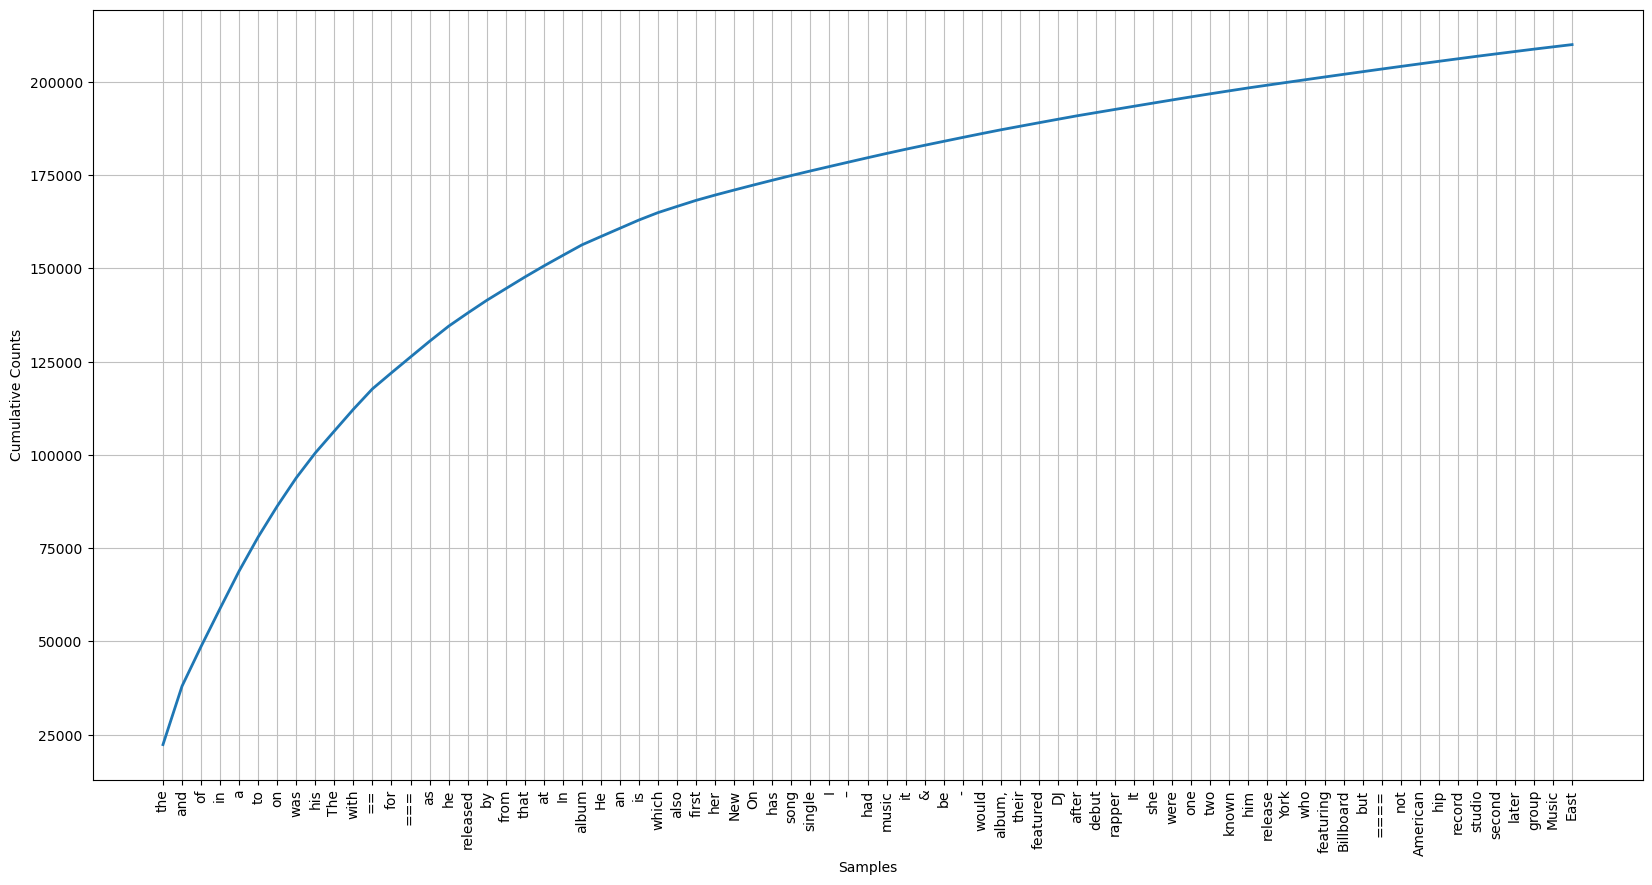

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [132]:
import matplotlib.pyplot as plt

fdist=FreqDist(all_words_east_coast)

fdist

# frequency of x word
fdist['love']

# sizing
plt.figure(figsize=(20, 10))

# Cumulative Frequency Plot of 50 most common words
fdist.plot(75, cumulative=True)


> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.


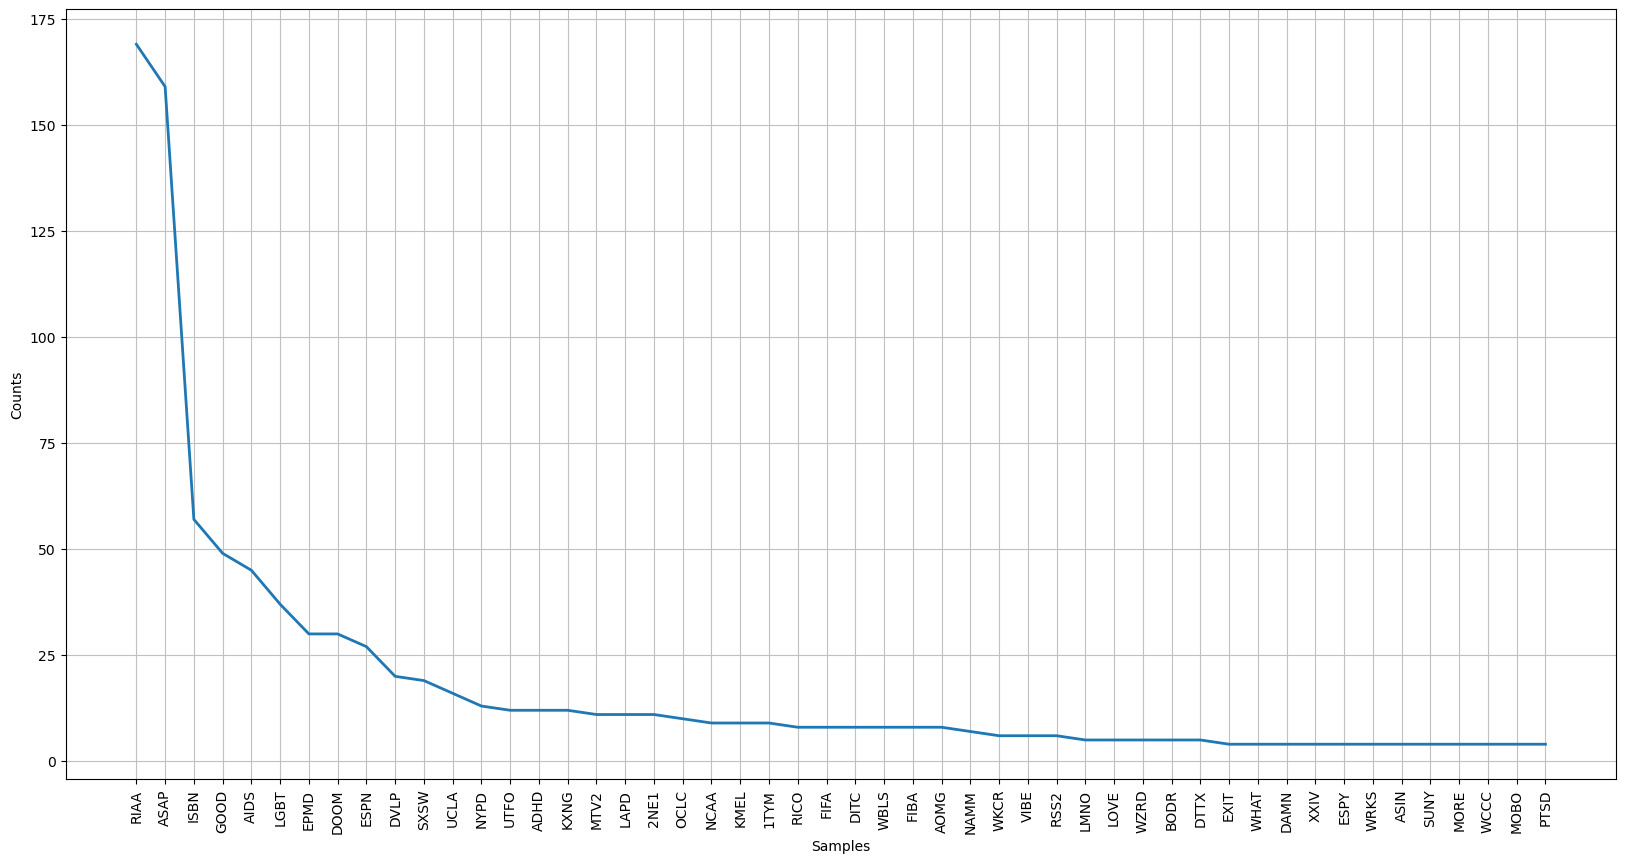

<Axes: xlabel='Samples', ylabel='Counts'>

In [135]:
# find four-letter tokens.
four_letter_words = [w for w in rapper_text if len(w) == 4]

# sizing
plt.figure(figsize=(20, 10))

# plot in decreasing order of frequency
fdist = FreqDist(four_letter_words)
fdist.plot(50, cumulative=False)


> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?


In [140]:
#sum(len(w) for w in rapper_text)

# average token length
round(sum(len(w) for w in rapper_text) / len(rapper_text), 2)


1.75

> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

In [143]:
def vocab_size(text):
    return len(set(text))


vocab_size(rapper_text)


1925

In [154]:
from nltk.tokenize import word_tokenize
import os

def percent(word, text):
    if isinstance(text, str):
        tokenized_text = word_tokenize(text.lower())
    elif isinstance(text, list):
        tokenized_text = [w.lower() for w in text]
    else:
        return "Invalid input type for text"
        
    word_count = tokenized_text.count(word.lower())
    total_words = len(tokenized_text)
    percentage = (word_count / total_words) * 100
    
    return percentage

# Initialize an empty dictionary to hold the results
results = {}

# Loop through each file in the RapperTexts directory
for filename in os.listdir("RapperTexts"):
    if filename.endswith(".txt"):
        filepath = os.path.join("RapperTexts", filename)
        
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()
            
        # Apply the percent function and store the result
        percentage = percent('Dre', text)
        results[filename] = percentage

# Print in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
sorted_results





[('Dr. Dre.txt', 1.9836639439906651),
 ('Hittman.txt', 1.5151515151515151),
 ('Slim the Mobster.txt', 1.3592233009708738),
 ('Bishop Lamont.txt', 1.2605042016806722),
 ('The D.O.C..txt', 1.0484273589615578),
 ('Sleep Dank.txt', 0.9433962264150944),
 ('Eazy-E.txt', 0.8295625942684767),
 ('Mac Dre.txt', 0.8169934640522877),
 ('Warren G.txt', 0.723922342875946),
 ('Mac Mall.txt', 0.7172131147540983),
 ('Sam Sneed.txt', 0.6787330316742082),
 ('The Unknown DJ.txt', 0.6568144499178982),
 ('RBX.txt', 0.6451612903225806),
 ('Daz Dillinger.txt', 0.644122383252818),
 ('Scoop DeVille.txt', 0.6134969325153374),
 ('Sir Jinx.txt', 0.603448275862069),
 ('King T.txt', 0.5658852061438965),
 ('Luni Coleone.txt', 0.4861111111111111),
 ('Rydah J. Klyde.txt', 0.48543689320388345),
 ('Xzibit.txt', 0.4475703324808184),
 ('Tim Dog.txt', 0.4421518054532056),
 ('Focus....txt', 0.426049908703591),
 ('Nate Dogg.txt', 0.4076878276062901),
 ('Soopafly.txt', 0.38095238095238093),
 ('Ice Cube.txt', 0.3548319766228345

# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.


### Exercise 4

    ☼ Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?



{}


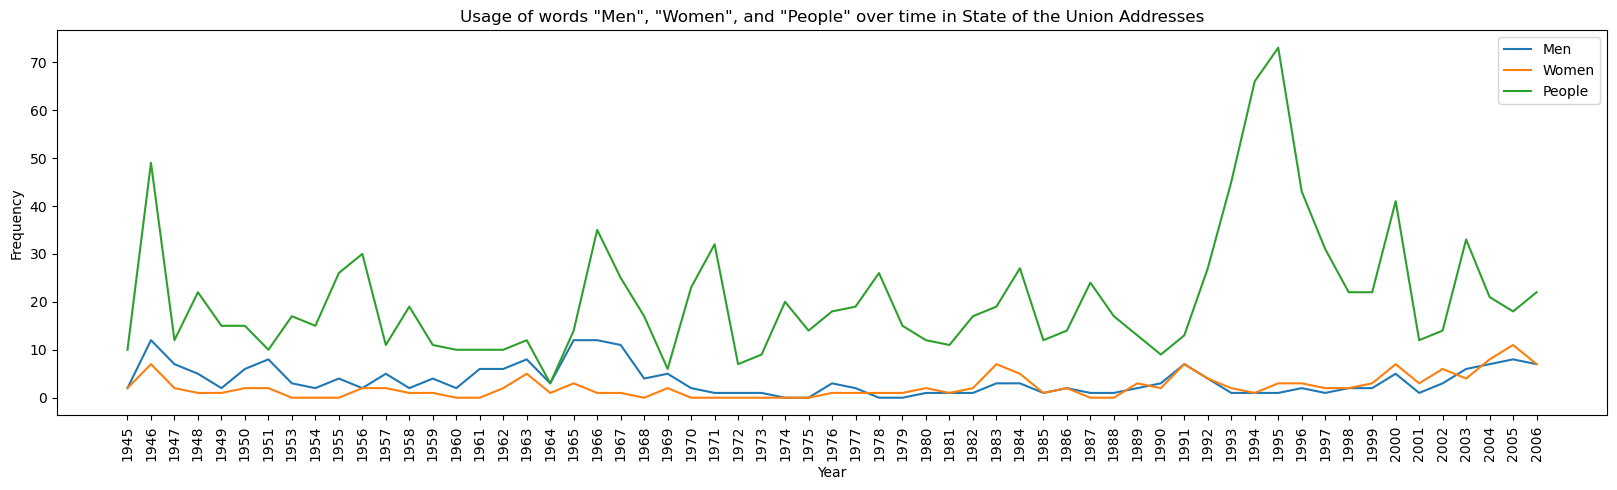

In [185]:
import nltk
from nltk.corpus import state_union

word_count_dict = {}

men_count_by_year = {}
women_count_by_year = {}
people_count_by_year = {}

for file_id in sorted(state_union.fileids()):
    year = file_id.split('-')[0]  # Extract the year from the file_id
    words = [word.lower() for word in state_union.words(file_id)]
    
    men_count = words.count('men')
    women_count = words.count('women')
    people_count = words.count('people')
    
    men_count_by_year[year] = men_count
    women_count_by_year[year] = women_count
    people_count_by_year[year] = people_count


print(word_count_dict)
plt.figure(figsize=(20, 5))

# Plot for 'men'
plt.plot(list(men_count_by_year.keys()), list(men_count_by_year.values()), label='Men')

# Plot for 'women'
plt.plot(list(women_count_by_year.keys()), list(women_count_by_year.values()), label='Women')

# Plot for 'people'
plt.plot(list(people_count_by_year.keys()), list(people_count_by_year.values()), label='People')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Usage of words "Men", "Women", and "People" over time in State of the Union Addresses')
plt.xticks(rotation=90) #Vertical x-axis labels
plt.legend()
plt.show()


From the graph we can observe that there has been a more even distribution of the 2 genders throughout the years. As a possible substitute to "Man" we see spikes of "people" being used more.

### Exercise 8

    ◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).


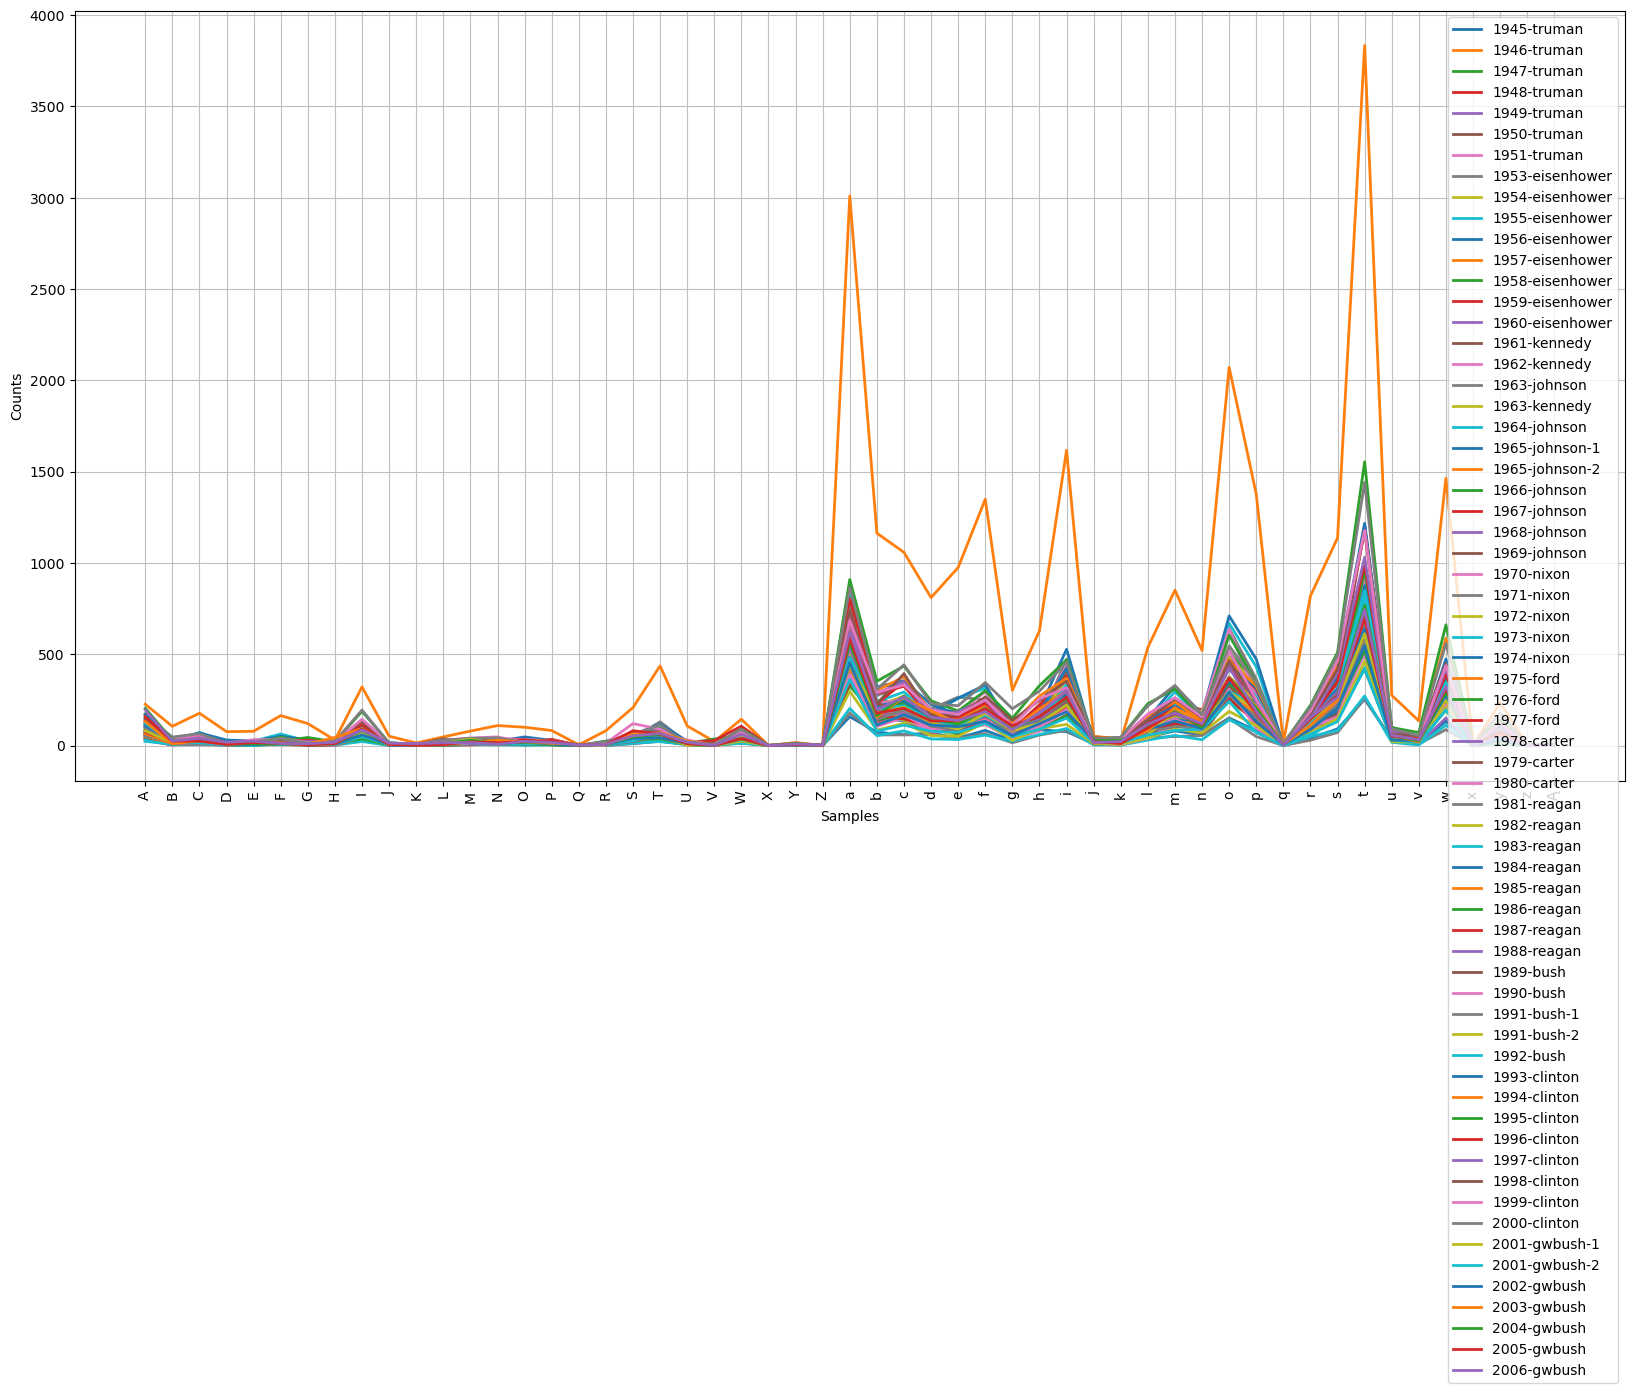

<Axes: xlabel='Samples', ylabel='Counts'>

In [195]:
# Prepare the data correctly
name_list = [(fileid[:-4], name[0]) for fileid in state_union.fileids() for name in state_union.words(fileid)]
corrected_name_list = [(gender, initial) for (filename, initial) in name_list for gender in [filename.lower()] if initial.isalpha()]

CFD = nltk.ConditionalFreqDist(corrected_name_list)

# Plot the data
plt.figure(figsize=(20, 10))
CFD.plot()



### Exercise 11

    ◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?




In [196]:
from nltk.corpus import brown

cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

# Investigate Modal Distributions
modals = ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'should']
genres = brown.categories()

print("Modal Distribution Across Genres")
print("================================")
cfd.tabulate(conditions=genres, samples=modals)

# Look for Other Patterns
pronouns = ['he', 'she', 'it', 'they', 'we', 'i']
articles = ['the', 'a', 'an']
prepositions = ['in', 'of', 'at', 'on', 'with']

print("\nPronoun Distribution Across Genres")
print("==================================")
cfd.tabulate(conditions=genres, samples=pronouns)

print("\nArticle Distribution Across Genres")
print("=================================")
cfd.tabulate(conditions=genres, samples=articles)

print("\nPreposition Distribution Across Genres")
print("=====================================")
cfd.tabulate(conditions=genres, samples=prepositions)

Modal Distribution Across Genres
                   can  could    may  might   must   will  would should 
      adventure     48    154      7     59     27     51    194     17 
 belles_lettres    249    216    221    113    171    246    397    105 
      editorial    124     57     79     39     55    235    185     90 
        fiction     39    168     10     44     55     56    291     38 
     government    119     38    179     13    102    244    120    113 
        hobbies    276     59    143     22     84    269     83     73 
          humor     17     33      8      8      9     13     56      7 
        learned    367    159    336    128    203    340    321    178 
           lore    170    142    170     50     96    178    188     78 
        mystery     45    145     15     57     31     25    189     29 
           news     94     87     93     38     53    389    246     61 
       religion     84     59     79     12     54     72     69     45 
        reviews   

The data shows that different genres have distinct patterns in the use of modals and pronouns. For example, 'news' frequently uses "will," likely indicating a focus on future events. Genres like 'adventure' and 'romance' show a high use of gender-specific pronouns ('he' for advanture and 'she' for romance), reflecting their narrative focus. These differences in closed-class words can be telling of the themes or styles specific to each genre.

### Exercise 15

    ◑ Write a program to find all words that occur at least three times in the Brown Corpus.


In [200]:
fdist = FreqDist(brown.words())
three_times_words = [w for w in set(brown.words()) if fdist[w] >= 3]
three_times_words[:10]


['exclusive',
 'Charles',
 'plaintiff',
 'suburbs',
 'destined',
 'Miami',
 'link',
 'enthralling',
 'Frelinghuysen',
 'crouched']

### Exercise 16

    ◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?


In [202]:
from nltk.corpus import brown

brown.categories()  # Brown Corpus genres

# greatest number of tokens per type
genre_max = {}
for genre in brown.categories():
    genre_tokens = brown.words(categories=genre)
    genre_types = set(genre_tokens)
    genre_max[genre] = round(len(genre_tokens) / len(genre_types))

# Sort the dictionary by value
sorted_genre_max = sorted(genre_max.items(), key=lambda x: x[1], reverse=True)
sorted_genre_max



[('learned', 11),
 ('belles_lettres', 9),
 ('government', 9),
 ('adventure', 8),
 ('lore', 8),
 ('mystery', 8),
 ('romance', 8),
 ('fiction', 7),
 ('hobbies', 7),
 ('news', 7),
 ('editorial', 6),
 ('religion', 6),
 ('reviews', 5),
 ('humor', 4),
 ('science_fiction', 4)]

### Exercise 17

    ◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.


In [209]:
from nltk.corpus import stopwords   # Import the stopword list

fdist = FreqDist(word.lower() for word in brown.words())  # Converting to lowercase here
stopwords = stopwords.words('english')

# Check if in stopwords or .isalpha()
words = [w for w in set(brown.words()) if w not in stopwords and w.isalpha()]
words = sorted(words, key=lambda x: fdist[x], reverse=True)
words[:50]




['one',
 'would',
 'said',
 'new',
 'could',
 'time',
 'two',
 'may',
 'first',
 'like',
 'man',
 'even',
 'made',
 'also',
 'many',
 'must',
 'back',
 'years',
 'much',
 'way',
 'well',
 'people',
 'little',
 'state',
 'good',
 'make',
 'world',
 'still',
 'see',
 'men',
 'work',
 'long',
 'get',
 'life',
 'never',
 'day',
 'another',
 'know',
 'last',
 'us',
 'might',
 'great',
 'old',
 'year',
 'come',
 'since',
 'go',
 'came',
 'right',
 'used']

### Exercise 18

    ◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.


In [210]:
bigrams = nltk.bigrams(brown.words())

bigrams = [(w1, w2) for (w1, w2) in bigrams if w1.isalpha() and w2.isalpha()]
bigrams = sorted(bigrams, key=lambda x: fdist[x], reverse=True)
bigrams = [(w1, w2) for (w1, w2) in bigrams if w1 not in stopwords and w2 not in stopwords]

bigrams[:50]


[('The', 'Fulton'),
 ('Fulton', 'County'),
 ('County', 'Grand'),
 ('Grand', 'Jury'),
 ('Jury', 'said'),
 ('said', 'Friday'),
 ('recent', 'primary'),
 ('primary', 'election'),
 ('election', 'produced'),
 ('irregularities', 'took'),
 ('took', 'place'),
 ('The', 'jury'),
 ('City', 'Executive'),
 ('Executive', 'Committee'),
 ('term', 'jury'),
 ('Fulton', 'Superior'),
 ('Superior', 'Court'),
 ('Court', 'Judge'),
 ('Judge', 'Durwood'),
 ('Durwood', 'Pye'),
 ('investigate', 'reports'),
 ('Ivan', 'Allen'),
 ('relative', 'handful'),
 ('jury', 'said'),
 ('widespread', 'interest'),
 ('The', 'jury'),
 ('jury', 'said'),
 ('election', 'laws'),
 ('often', 'ambiguous'),
 ('It', 'recommended'),
 ('Fulton', 'legislators'),
 ('legislators', 'act'),
 ('laws', 'studied'),
 ('The', 'grand'),
 ('grand', 'jury'),
 ('jury', 'commented'),
 ('Fulton', 'County'),
 ('County', 'purchasing'),
 ('purchasing', 'departments'),
 ('well', 'operated'),
 ('follow', 'generally'),
 ('generally', 'accepted'),
 ('accepted', 'p

> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>

    ★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
    
    Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
    



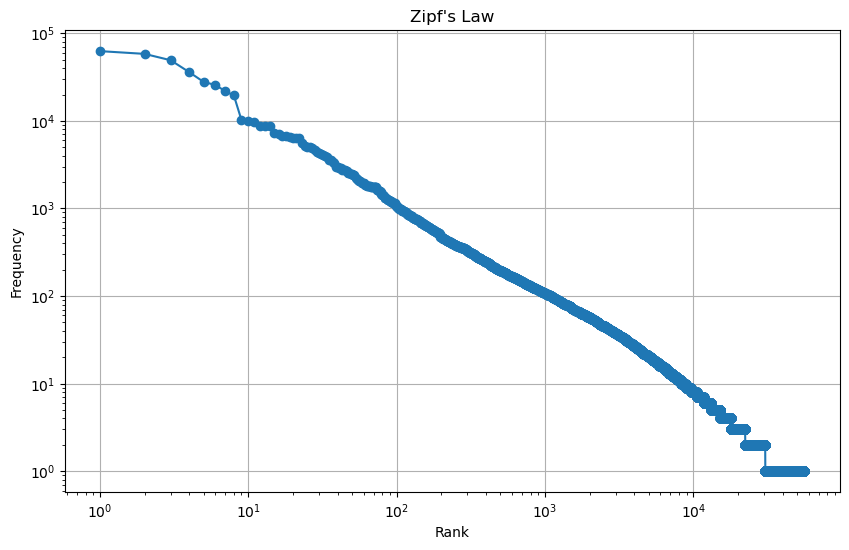

In [211]:
import nltk
from nltk.corpus import brown
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_zipf(text):
    # Count the frequency of each word
    freq_dist = Counter(text)
    
    # Sort the words by frequency
    sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the frequencies and plot them against their ranks
    frequencies = [freq for word, freq in sorted_words]
    ranks = list(range(1, len(frequencies) + 1))
    
    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker="o")
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law')
    plt.grid(True)
    plt.show()

plot_zipf(brown.words())


The somewhat straight diagonal line is an indication that we indeed are seeing Zipf's law. Meaning the frequency of each word in text is inversely proportional to its rank.

    Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

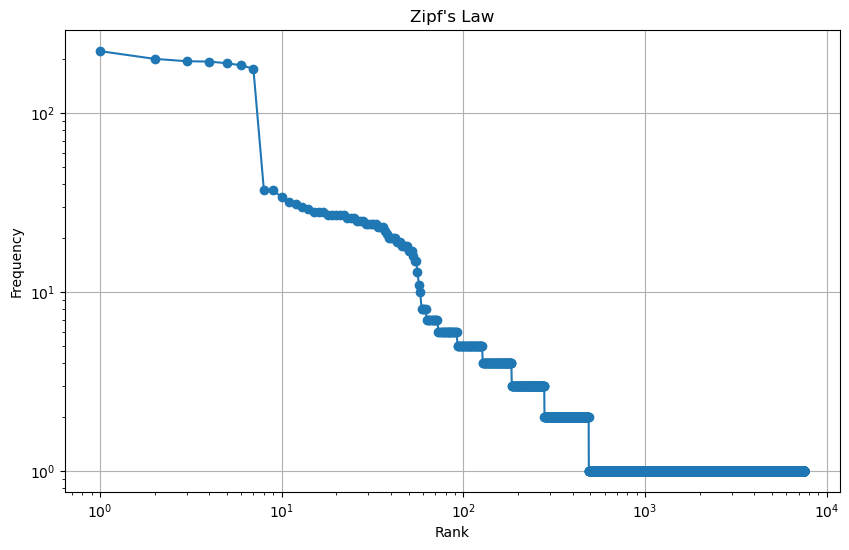

In [212]:
# Generate a random text
random_text = "".join(random.choice("abcdefg ") for _ in range(100000))

# Tokenize the random text by splitting based on spaces
random_words = random_text.split()

plot_zipf(random_words)
